# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [83]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,839,90,44,72,157,64,8,137,48,18,144,159,283,171,65,9,4,196,203
1,668,94,46,91,175,70,12,157,43,20,155,172,358,192,69,15,21,190,200
2,17,99,41,77,197,69,6,177,36,21,139,202,485,151,72,4,10,198,199
3,325,82,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
4,129,100,48,95,209,68,7,199,32,23,150,216,605,200,73,7,11,192,194
5,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
6,542,93,39,86,180,59,9,167,39,20,134,186,418,129,63,6,17,197,204
7,604,88,40,79,183,62,7,176,38,21,138,200,462,150,66,0,29,189,199
8,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183
9,832,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199


Methods `describe` and `info` deliver some useful information.

In [84]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.032787,93.903461,44.797814,82.156648,169.462659,61.723133,8.652095,168.870674,40.896175,20.575592,147.892532,188.724954,440.213115,173.890710,72.284153,6.415301,12.327869,189.224044,195.845173
std,245.203340,8.235348,6.201094,15.797332,33.290210,7.798315,4.837986,33.148412,7.803130,2.576605,14.552363,30.896740,175.982881,32.475579,7.307589,5.080971,8.824628,6.224722,7.461805
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,429.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,586.000000,197.000000,76.000000,10.000000,18.000000,194.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,182.000000,287.000000,998.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [85]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [86]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

# для того чтобы исключить доминирование признаков с большими значениями и для большей усточивости численных методов
# модели проведем нормальизацию даннах

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pd))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_train_scaled.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.697965,-0.474421,-0.128774,-0.643521,-0.374706,0.292235,-0.134909,-0.962331,0.911212,-1.000519,-0.267728,-0.962952,-0.894158,-0.089093,-0.997702,0.509166,-0.944568,1.089548,0.959735
1,0.999948,0.011733,0.194044,0.560311,0.166487,1.062334,0.692635,-0.358433,0.269859,-0.223595,0.488852,-0.541811,-0.467591,0.558136,-0.449827,1.691120,0.983615,0.124771,0.557320
2,-1.657413,0.619426,-0.613001,-0.326723,0.827945,0.933984,-0.548681,0.245464,-0.628035,0.164866,-0.611629,0.430050,0.254728,-0.705502,-0.038920,-0.475796,-0.264033,1.411141,0.423182
3,-0.400167,-1.446729,-0.128774,-1.213757,-1.396958,-0.991262,-0.341795,-0.539603,0.526400,-0.612057,-0.061388,-0.736184,-0.632531,0.342393,1.193799,-0.672788,-0.944568,-1.643988,-1.857164
4,-1.200232,0.740964,0.516861,0.813749,1.188740,0.805634,-0.341795,0.909751,-1.141118,0.941789,0.144952,0.883586,0.937234,0.804700,0.098049,0.115181,-0.150610,0.446363,-0.247508
5,1.595915,-1.082113,-0.290183,-1.023678,-1.396958,-0.862913,-0.341795,-0.569798,0.526400,-0.612057,-0.130168,-0.541811,-0.649593,-0.027452,1.467737,-0.475796,0.303080,-1.483192,-1.723026
6,0.485620,-0.109805,-0.935819,0.243513,0.316818,-0.349514,0.071977,-0.056485,-0.243223,-0.223595,-0.955529,-0.088276,-0.126338,-1.383552,-1.271640,-0.081811,0.529925,1.250345,1.093873
7,0.738702,-0.717498,-0.774410,-0.200004,0.407017,0.035536,-0.341795,0.215269,-0.371494,0.164866,-0.680409,0.365260,0.123914,-0.736322,-0.860733,-1.263765,1.890996,-0.036025,0.423182
8,-1.706396,1.591734,1.969542,1.510704,0.076288,-1.504662,-0.548681,2.600664,-1.910741,2.884097,1.451772,2.956891,2.939253,2.777209,1.741675,-0.278803,-0.377455,-1.322396,-1.723026
9,1.669391,1.713273,0.678270,1.700783,1.038409,-0.092814,0.485749,1.302284,-1.269388,1.330251,0.763972,1.304726,1.278487,1.267007,-0.175889,1.888112,-0.150610,0.124771,0.423182


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

{'C': np.float64(70.37595070351503), 'penalty': 'l2'}
F1 0.812099
Accuracy 0.8114478114478114


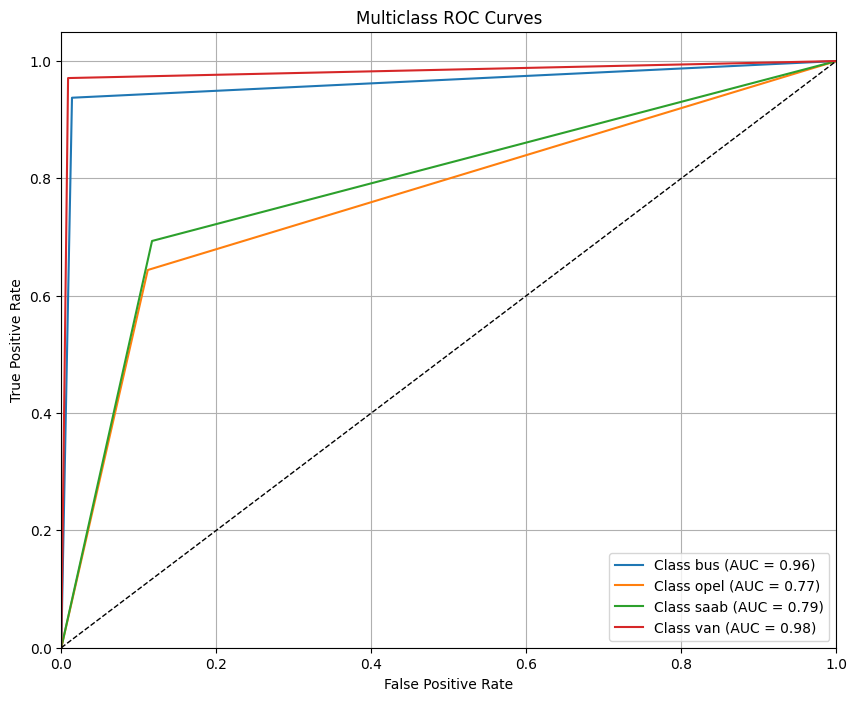

In [ ]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
from scipy.stats import loguniform

log_reg = LogisticRegression(
    # multi_class='multinomial', # FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

param_dist = {
    'C': loguniform(0.001, 100),
    'penalty': ['l2'],
}
search = RandomizedSearchCV(log_reg, param_dist, scoring=['f1_macro', 'accuracy'], refit='f1_macro')
search.fit(X_train_scaled, y_train_encoded)
print(search.best_params_)

y_pred = search.predict(X_test_scaled)

print(f'F1 {f1_score(y_test_encoded, y_pred, average='macro'):4f}')
print(f'Accuracy {accuracy_score(y_test_encoded, y_pred)}')


y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])

n_classes = 4

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

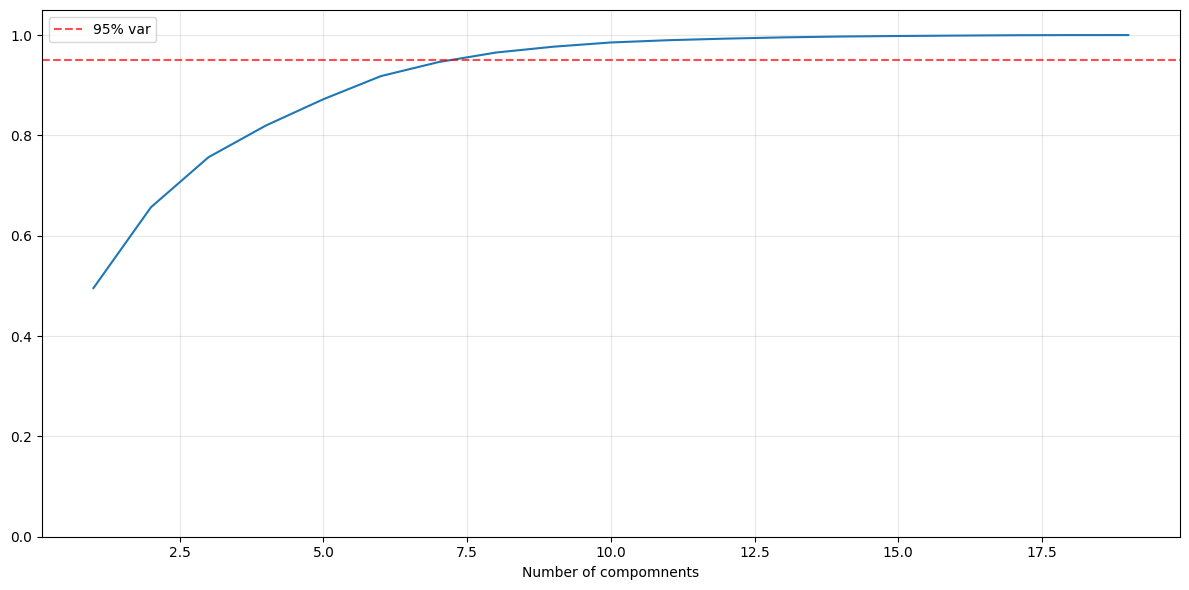

In [89]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))

# Plot 2: Cumulative explained variance
plt.subplot(1, 1, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% var')
plt.xlabel('Number of compomnents')

plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Из графика выше видим что 8 компонент несут более 95% информации по датасету, возьмем это количество компонент.

In [90]:
### YOUR CODE HERE

pca_selected = PCA(n_components=8)
X_train_pca_selected = pca_selected.fit_transform(X_train_scaled)
X_test_pca_selected = pca_selected.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

{'C': np.float64(1.1260735586304815), 'penalty': 'l2'}
F1 0.585426
Accuracy 0.5993265993265994


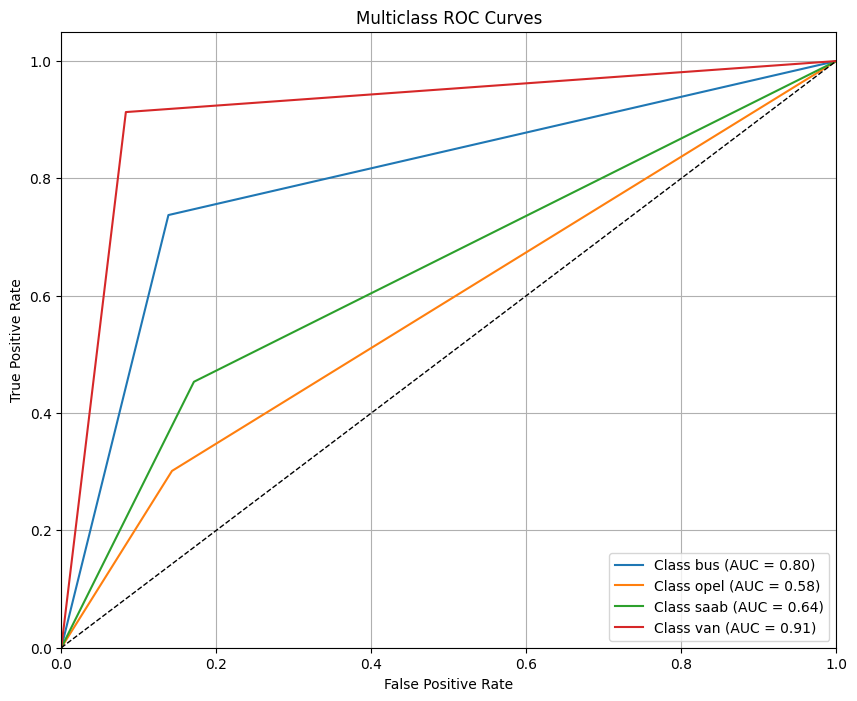

In [98]:
### YOUR CODE HERE
log_reg = LogisticRegression(
    # multi_class='multinomial', # FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

param_dist = {
    'C': loguniform(0.001, 100),
    'penalty': ['l2'],
}
search = RandomizedSearchCV(log_reg, param_dist, scoring=['f1_macro', 'accuracy'], refit='f1_macro')
search.fit(X_train_pca_selected, y_train_encoded)
print(search.best_params_)

y_pred = search.predict(X_test_pca_selected)

print(f'F1 {f1_score(y_test_encoded, y_pred, average='macro'):4f}')
print(f'Accuracy {accuracy_score(y_test_encoded, y_pred)}')

y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])

n_classes = 4

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
F1 0.659267
Accuracy 0.6734006734006734


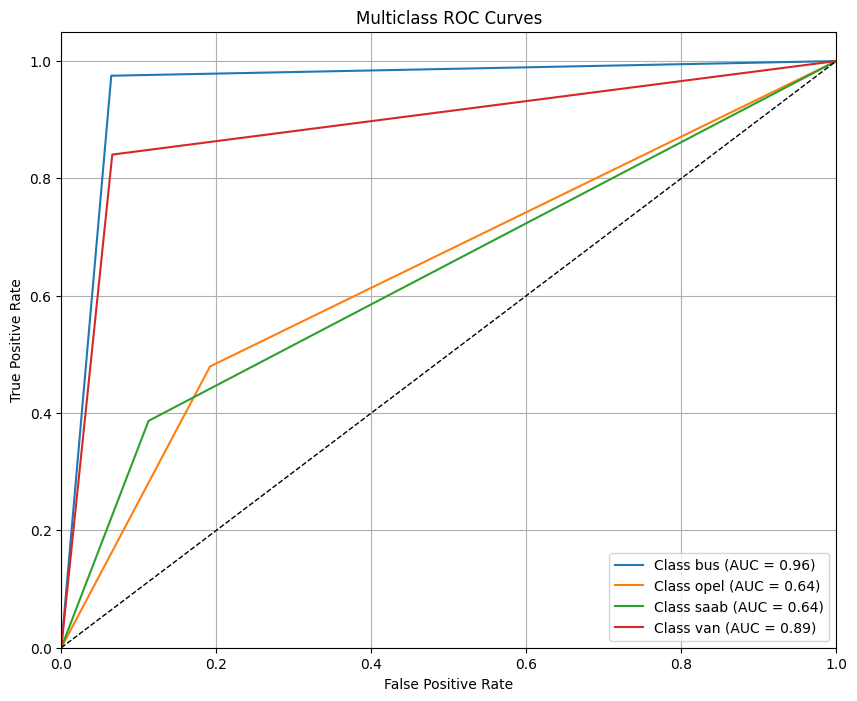

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# YOUR CODE HERE
param_grid_simple = {
    'max_depth': list(range(1, 10)) + [None]
}
dt_simple = DecisionTreeClassifier()

search = GridSearchCV(
    dt_simple,
    param_grid_simple,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train_encoded)
best_dt_simple = search.best_estimator_

y_pred = best_dt_simple.predict(X_test)
print(f'F1 {f1_score(y_test_encoded, y_pred, average='macro'):4f}')
print(f'Accuracy {accuracy_score(y_test_encoded, y_pred)}')

y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])
n_classes = 4
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Видим,что f1 и accuracy у моделей упали после выделения главных компонент. Но графиках roc auc также видно ухудшение.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/890164119.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/890164119.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


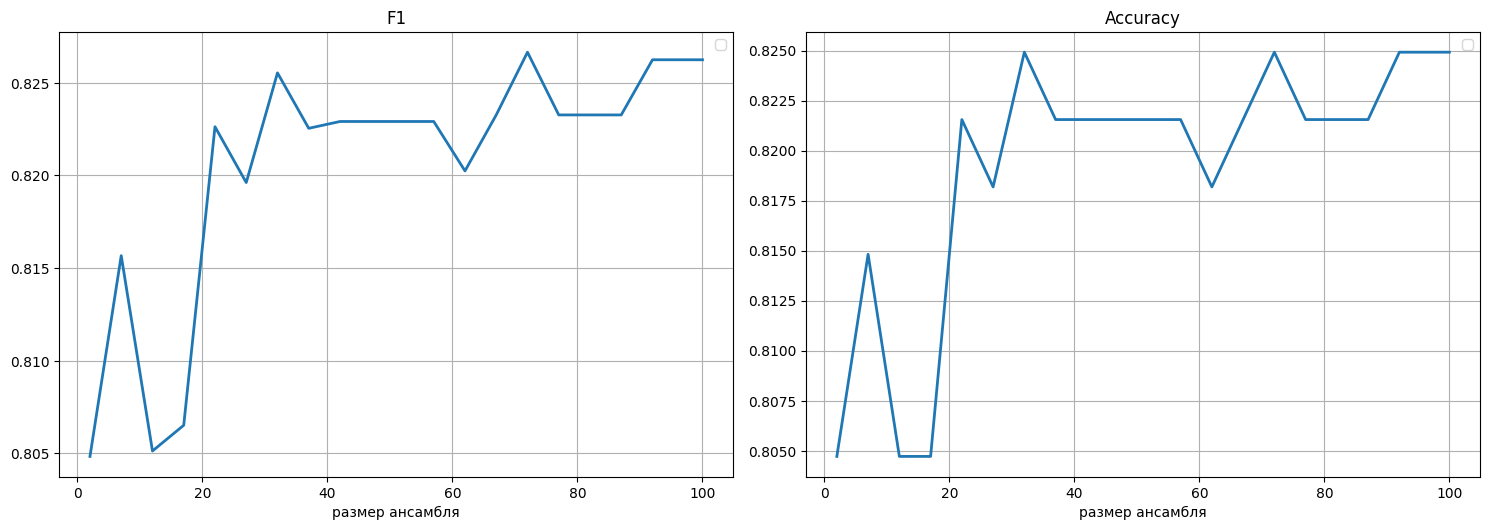

Опитмальный размер ансамбля: 72 (F1 = 0.8266)
F1 = 0.8262, Accuracy = 0.8249


In [ ]:
# YOUR CODE HERE
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score

ensemble_sizes = list(range(2, 101, 5))
if 100 not in ensemble_sizes:
    ensemble_sizes.append(100)
n_max = 100
bootstrap_samples = []
for i in range(n_max):
    X_boot, y_boot = resample(X_train_scaled, y_train_encoded, random_state=42 + i)
    bootstrap_samples.append((X_boot, y_boot))

lr_bagging_f1 = []
lr_bagging_acc = []

for n_size in ensemble_sizes:
    lr_base = LogisticRegression(
        **{'C': np.float64(13.150815941583131), 'penalty': 'l2'},
        solver='saga',
        tol=1e-3,
        max_iter=500,
        random_state=42
    )
    lr_bagging = BaggingClassifier(
        estimator=lr_base,
        n_estimators=n_size,
        max_samples=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    lr_bagging.fit(X_train_scaled, y_train)
    lr_bag_pred = lr_bagging.predict(X_test_scaled)
    lr_bagging_f1.append(f1_score(y_test, lr_bag_pred, average='macro'))
    lr_bagging_acc.append(accuracy_score(y_test, lr_bag_pred))

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
plt.plot(ensemble_sizes, lr_bagging_f1)
plt.xlabel('размер ансамбля')
plt.title('F1')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(ensemble_sizes, lr_bagging_acc)
plt.xlabel('размер ансамбля')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

lr_optimal_idx = np.argmax(lr_bagging_f1)
lr_optimal_size = ensemble_sizes[lr_optimal_idx]

print(f"Опитмальный размер ансамбля: {lr_optimal_size} (F1 = {lr_bagging_f1[lr_optimal_idx]:.4f})")
print(f"F1 = {lr_bagging_f1[-1]:.4f}, Accuracy = {lr_bagging_acc[-1]:.4f}")


/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/4094831980.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/4094831980.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


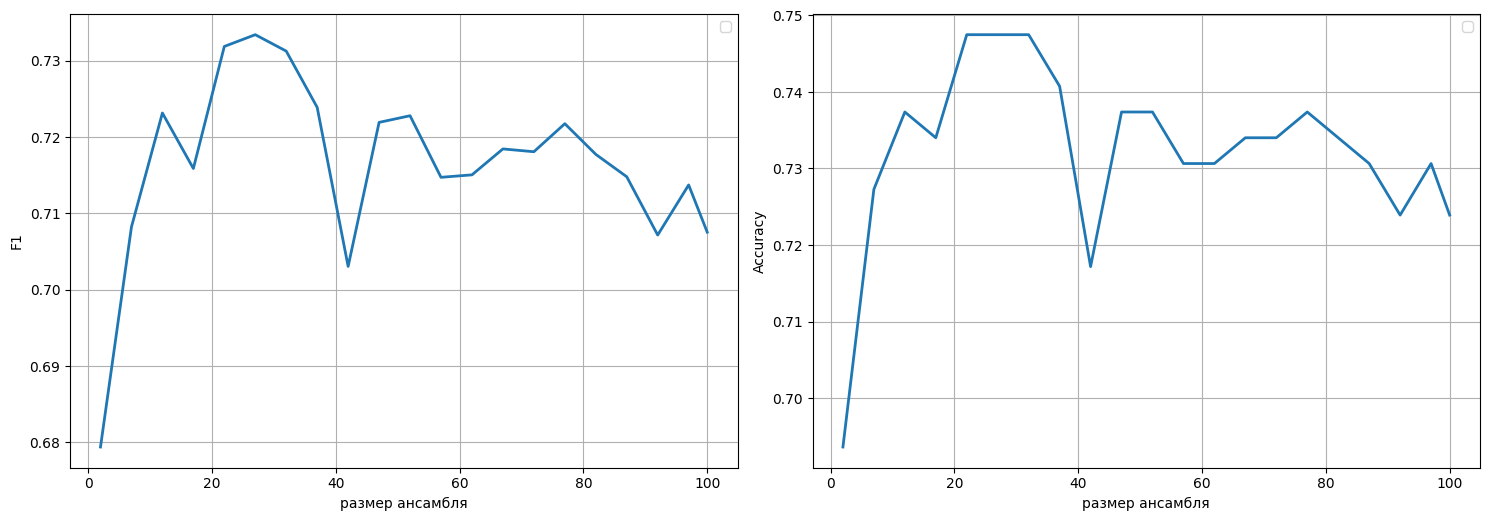

Опитмальный размер ансамбля: 27 (F1 = 0.7334)
F1 = 0.7075, Accuracy = 0.7239


In [95]:
dt_bagging_f1 = []
dt_bagging_acc = []

for n_size in ensemble_sizes:
    dt_base = DecisionTreeClassifier(max_depth=6)
    dt_bagging = BaggingClassifier(
        estimator=dt_base,
        n_estimators=n_size,
        max_samples=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    dt_bagging.fit(X_train_scaled, y_train)
    dt_bag_pred = dt_bagging.predict(X_test_scaled)
    dt_bagging_f1.append(f1_score(y_test, dt_bag_pred, average='macro'))
    dt_bagging_acc.append(accuracy_score(y_test, dt_bag_pred))

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
plt.plot(ensemble_sizes, dt_bagging_f1, linewidth=2)
plt.xlabel('размер ансамбля')
plt.ylabel('F1')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(ensemble_sizes, dt_bagging_acc, linewidth=2)
plt.xlabel('размер ансамбля')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

dt_optimal_idx = np.argmax(dt_bagging_f1)
dt_optimal_size = ensemble_sizes[dt_optimal_idx]

print(f"Опитмальный размер ансамбля: {dt_optimal_size} (F1 = {dt_bagging_f1[dt_optimal_idx]:.4f})")
print(f"F1 = {dt_bagging_f1[-1]:.4f}, Accuracy = {dt_bagging_acc[-1]:.4f}")


F1 и accuracy улучшидись используя бэггинг особенно в логистической регрессии. Оптимальные значени напечатаны под графиками. Для бэггинга параметры подобранные для этого кажется являются оптимальными, так как по сути тренировка идет на концептуально тех же данных, просто другим способом использую подмножество тренировчного датасета на каждом этапе.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Опитмальное количество деревьев: 92 (F1 = 0.7510)


/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/1438282865.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/_q/wfkf0_v13rz2f2w6vtlg9g2h0000gp/T/ipykernel_76290/1438282865.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


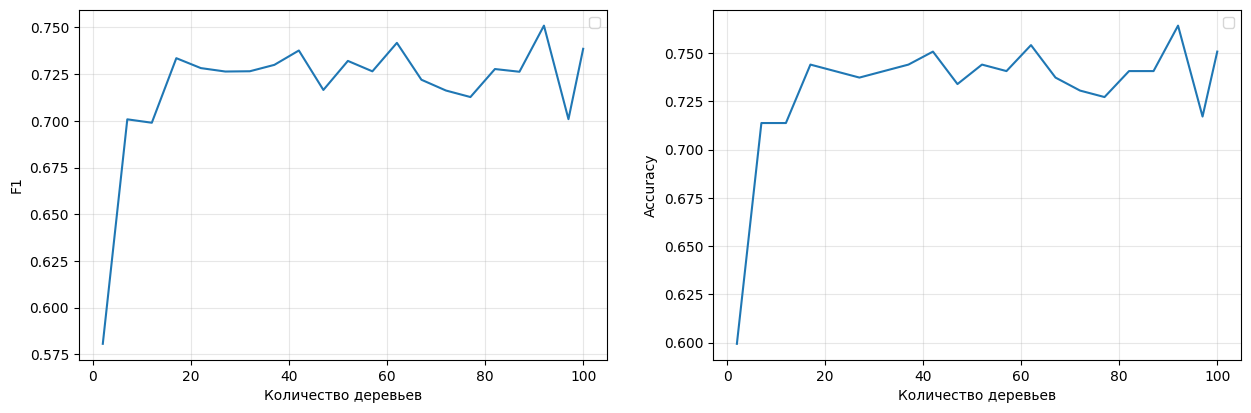

In [103]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rf_f1_scores = []
rf_accuracy_scores = []

max_features_options = ['sqrt', 'log2', None]  # sqrt is default
max_features_results = {option: {'f1': [], 'accuracy': []} for option in max_features_options}

for n_est in ensemble_sizes:
    rf = RandomForestClassifier(
        n_estimators=n_est,
        max_features='sqrt',
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_f1_scores.append(rf_f1)
    rf_accuracy_scores.append(rf_accuracy)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(ensemble_sizes, rf_f1_scores)
plt.xlabel('Количество деревьев')
plt.ylabel('F1')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(ensemble_sizes, rf_accuracy_scores)
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)


rf_optimal_idx = np.argmax(rf_f1_scores)
rf_optimal_size = ensemble_sizes[rf_optimal_idx]

print(f"Опитмальное количество деревьев: {rf_optimal_size} (F1 = {rf_f1_scores[rf_optimal_idx]:.4f})")

Видим что модели Лес потребовалось больше деревев для оптимального решения, чем ансамблей деревьев в бэггинге. Это связано с тем, что бэггинг тренироует одно "большое" дерево на подмножествах датасета, а лес много "маленьких" деревьев на подмножествах датасета в том числе и по фичам.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

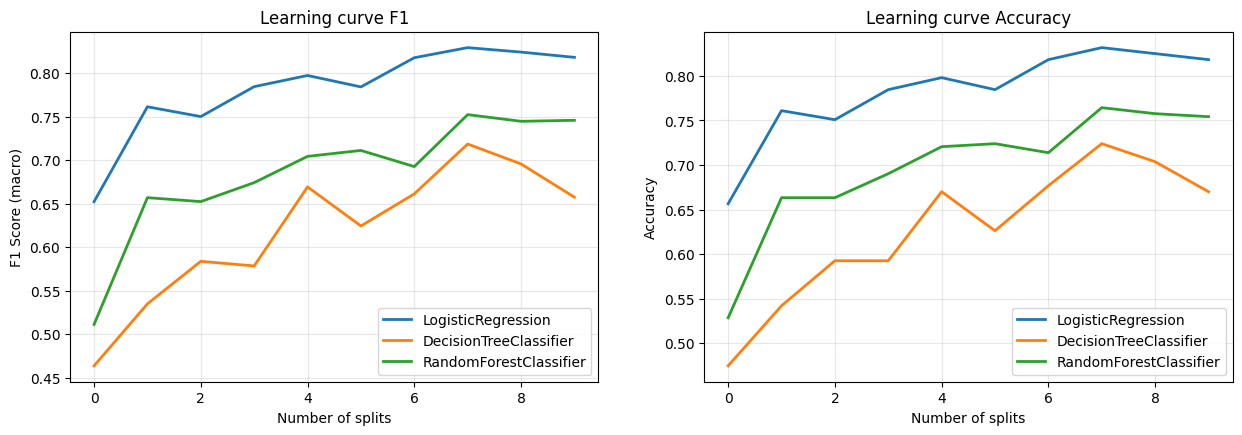

In [104]:
# YOUR CODE HERE
chunk_size = X_train.shape[0] // 10
splits = [X_train[i:i + chunk_size] for i in range(0, len(X_train), chunk_size)]
models = {
    'LogisticRegression': LogisticRegression(
    **{'C': np.float64(2.1259515737343824), 'penalty': 'l2'},
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=6),
    'RandomForestClassifier': RandomForestClassifier(
        n_estimators=17,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
}
result = {
    'LogisticRegression': {
        'f1': [],
        'acc': [],
    },
    'DecisionTreeClassifier': {
        'f1': [],
        'acc': [],
    },
    'RandomForestClassifier': {
        'f1': [],
        'acc': [],
    }
}
for i in range(1, len(splits)):
    X_split = scaler.fit_transform(np.concatenate(splits[:i], axis=0))
    for model_name, model in models.items():
        model.fit(X_split, y_train_encoded[:X_split.shape[0]])
        y_pred = model.predict(X_test_scaled)

        f1 = f1_score(y_test_encoded, y_pred, average='macro')
        accuracy = accuracy_score(y_test_encoded, y_pred)

        result[model_name]['f1'].append(f1)
        result[model_name]['acc'].append(accuracy)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for model_name, score in result.items():
    plt.plot(score['f1'], label=model_name, linewidth=2, markersize=4)
plt.xlabel('Number of splits')
plt.ylabel('F1 Score (macro)')
plt.title('Learning curve F1')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(2, 2, 2)
for model_name, score in result.items():
    plt.plot(score['acc'], label=model_name, linewidth=2, markersize=4)
plt.xlabel('Number of splits')
plt.ylabel('Accuracy')
plt.title('Learning curve Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

как видим увеличение датасета в целом во всех случаях положительно сказывается на обучении моделей, но кажется большой дисперия особенно у модели леса деревев.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [105]:
# YOUR CODE HERE
import xgboost as xgb

# Convert data to DMatrix format (XGBoost native format)
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

xgb_params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'eval_metric': ['mlogloss', 'merror']
}

evals_result = {}
xgb_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=100
)

optimal_trees_xgb = xgb_model.best_iteration
print(f"Оптимальное количество деревьев: {optimal_trees_xgb}")


[0]	train-mlogloss:1.27511	train-merror:0.16576	test-mlogloss:1.30156	test-merror:0.31650
[95]	train-mlogloss:0.05870	train-merror:0.00000	test-mlogloss:0.51428	test-merror:0.22559
Оптимальное количество деревьев: 46
